In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('datasets_28454_184859_Consumo_cerveja.csv')

In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#RENAMING COLUMNS
df.columns=["Date","Average Temp","Min Temp","Max Temp","Rainfall","Weekends","Beer consumption"]
df.head()

,Date,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Beer consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [6]:
df.shape

(941, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              365 non-null    object 
 1   Average Temp      365 non-null    object 
 2   Min Temp          365 non-null    object 
 3   Max Temp          365 non-null    object 
 4   Rainfall          365 non-null    object 
 5   Weekends          365 non-null    float64
 6   Beer consumption  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [8]:
df.isnull().sum()

Date                576
Average Temp        576
Min Temp            576
Max Temp            576
Rainfall            576
Weekends            576
Beer consumption    576
dtype: int64

In [9]:
pd.set_option("display.max_rows",10)

In [10]:
df.iloc[364:]

,Date,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Beer consumption
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#DELETE DATA EXPECT 1st YEAR DATA AS EXCEPT DATA IS NULL
after_dropping_df=df.drop(range(365,941))
after_dropping_df.shape

(365, 7)

In [12]:
after_dropping_df.tail()

,Date,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Beer consumption
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


In [13]:
after_dropping_df.isnull().sum()

Date                0
Average Temp        0
Min Temp            0
Max Temp            0
Rainfall            0
Weekends            0
Beer consumption    0
dtype: int64

In [14]:
temperatures=after_dropping_df[["Min Temp","Max Temp","Average Temp","Rainfall"]]
temperatures.head()

,Min Temp,Max Temp,Average Temp,Rainfall
0,"23,9","32,5","27,3",0
1,"24,5","33,5","27,02",0
2,"22,4","29,9","24,82",0
3,"21,5","28,6","23,98","1,2"
4,21,"28,3","23,82",0


In [15]:
import re
for index,row in temperatures.iterrows():
    for j in ["Min Temp","Max Temp","Average Temp","Rainfall"]:
        row[j]=re.sub(r',', '.', row[j])
temperatures.head()

,Min Temp,Max Temp,Average Temp,Rainfall
0,23.9,32.5,27.3,0
1,24.5,33.5,27.02,0
2,22.4,29.9,24.82,0
3,21.5,28.6,23.98,1.2
4,21,28.3,23.82,0


In [16]:
temperatures=temperatures.astype("float64")

In [17]:
data_df=after_dropping_df
temp=temperatures

In [18]:
for j in ["Min Temp","Max Temp","Average Temp","Rainfall"]:
    data_df[j]=temp[j]

In [19]:
data_df.head()

,Date,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Beer consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [20]:
data_df.tail()

,Date,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Beer consumption
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467
364,2015-12-31,24.76,20.2,29.0,0.0,0.0,22.446


In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              365 non-null    object 
 1   Average Temp      365 non-null    float64
 2   Min Temp          365 non-null    float64
 3   Max Temp          365 non-null    float64
 4   Rainfall          365 non-null    float64
 5   Weekends          365 non-null    float64
 6   Beer consumption  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [22]:
#EXTRACTING DAY AND MONTH FROM DATE FEATURE
date=pd.DataFrame(data_df["Date"])

In [23]:
date.head()

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [24]:
date.tail()

,Date
360,2015-12-27
361,2015-12-28
362,2015-12-29
363,2015-12-30
364,2015-12-31


In [25]:
# 1MONTH CONSUMPTION
months = np.array([])
days = np.array([])
for index, row in data_df.iterrows():
    months = np.append(months, re.search(r'-(.+?)-', row["Date"]).group(1))
    days = np.append(days, re.search(r'-..-(.+?)$', row["Date"]).group(1))
date["Month"] = months
date["Day"] = days
date[["Month", "Day"]] = date[["Month", "Day"]].astype("float64")
date.head()

,Date,Month,Day
0,2015-01-01,1.0,1.0
1,2015-01-02,1.0,2.0
2,2015-01-03,1.0,3.0
3,2015-01-04,1.0,4.0
4,2015-01-05,1.0,5.0


In [26]:
finaldata=pd.merge(data_df,date,on="Date",how="inner")

In [27]:
finaldata=finaldata.drop(["Date"],axis=1)

In [28]:
finaldata=finaldata[["Average Temp", "Min Temp", "Max Temp", "Rainfall", "Weekends", "Month", "Day", "Beer consumption"]]

In [29]:
finaldata.head()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
0,27.30,23.9,32.5,0.0,0.0,1.0,1.0,25.461
1,27.02,24.5,33.5,0.0,0.0,1.0,2.0,28.972
2,24.82,22.4,29.9,0.0,1.0,1.0,3.0,30.814
3,23.98,21.5,28.6,1.2,1.0,1.0,4.0,29.799
4,23.82,21.0,28.3,0.0,0.0,1.0,5.0,28.900


In [30]:
finaldata.tail()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
360,24.00,21.1,28.2,13.6,1.0,12.0,27.0,32.307
361,22.64,21.1,26.7,0.0,0.0,12.0,28.0,26.095
362,21.68,20.3,24.1,10.3,0.0,12.0,29.0,22.309
363,21.38,19.3,22.4,6.3,0.0,12.0,30.0,20.467
364,24.76,20.2,29.0,0.0,0.0,12.0,31.0,22.446


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train, test = train_test_split(finaldata, test_size = 0.2, random_state = 10)

In [33]:
print(train.shape)
print(test.shape)

(292, 8)
(73, 8)


In [34]:
train.describe()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,21.193904,17.420205,26.595890,5.026370,0.284247,6.551370,16.119863,25.408575
std,3.218504,2.874494,4.357635,11.741214,0.451829,3.459252,8.948652,4.382137
min,12.900000,10.600000,14.500000,0.000000,0.000000,1.000000,1.000000,14.343000
25%,18.785000,15.200000,23.700000,0.000000,0.000000,3.750000,8.000000,22.006250
50%,21.410000,17.800000,26.900000,0.000000,0.000000,7.000000,17.000000,24.946500
75%,23.280000,19.600000,29.425000,3.200000,1.000000,9.250000,24.000000,28.611750
max,28.860000,23.900000,36.500000,94.800000,1.000000,12.000000,31.000000,37.937000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF81F73F88>,
      dtype=object)

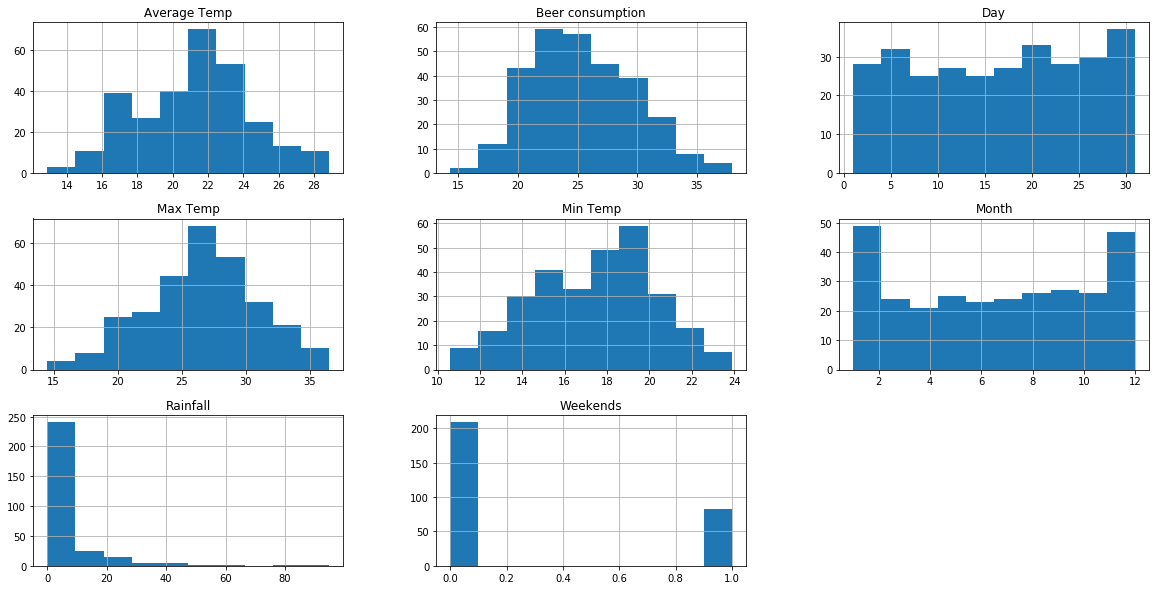

In [35]:
train.hist(figsize=(20,10))

In [36]:
corr=train.corr()

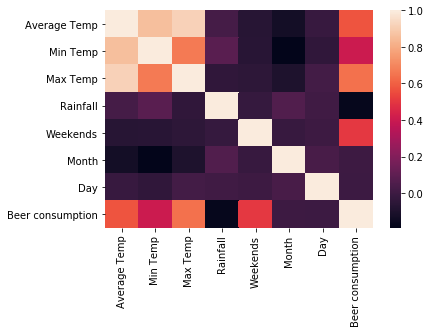

In [37]:
sns.heatmap(corr)

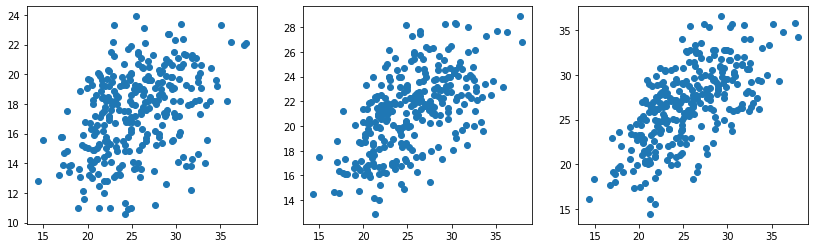

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].scatter(train["Beer consumption"], train["Min Temp"])
ax[1].scatter(train["Beer consumption"], train["Average Temp"])
ax[2].scatter(train["Beer consumption"], train["Max Temp"])

In [39]:
#DIFF MONTHS
diffmonths=train[["Month","Beer consumption"]]
diffmonths=diffmonths.groupby("Month").mean().reset_index()
diffmonths["Name"]=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
diffmonths.sort_values(by=["Beer consumption"],inplace=True,kind="heapsort")
diffmonths.reset_index(inplace=True)
diffmonths.drop(["index"],axis=1,inplace=True)

<BarContainer object of 12 artists>

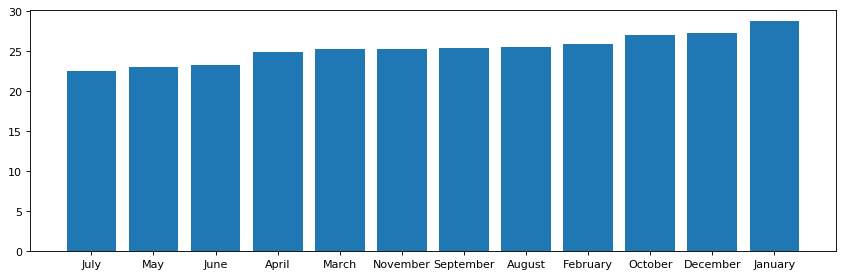

In [40]:
plt.figure(
    figsize=(13,4),
    dpi=80)
plt.bar(diffmonths["Name"],diffmonths["Beer consumption"])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 34 to 265
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Temp      292 non-null    float64
 1   Min Temp          292 non-null    float64
 2   Max Temp          292 non-null    float64
 3   Rainfall          292 non-null    float64
 4   Weekends          292 non-null    float64
 5   Month             292 non-null    float64
 6   Day               292 non-null    float64
 7   Beer consumption  292 non-null    float64
dtypes: float64(8)
memory usage: 20.5 KB


In [42]:
train.describe()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,21.193904,17.420205,26.595890,5.026370,0.284247,6.551370,16.119863,25.408575
std,3.218504,2.874494,4.357635,11.741214,0.451829,3.459252,8.948652,4.382137
min,12.900000,10.600000,14.500000,0.000000,0.000000,1.000000,1.000000,14.343000
25%,18.785000,15.200000,23.700000,0.000000,0.000000,3.750000,8.000000,22.006250
50%,21.410000,17.800000,26.900000,0.000000,0.000000,7.000000,17.000000,24.946500
75%,23.280000,19.600000,29.425000,3.200000,1.000000,9.250000,24.000000,28.611750
max,28.860000,23.900000,36.500000,94.800000,1.000000,12.000000,31.000000,37.937000


In [43]:
train.head()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
34,22.12,19.9,23.7,3.2,0.0,2.0,4.0,24.738
87,22.14,20.5,26.6,0.0,1.0,3.0,29.0,26.116
57,24.64,20.4,31.4,0.6,0.0,2.0,27.0,26.241
152,16.04,15.0,17.5,0.5,0.0,6.0,2.0,20.106
204,18.46,14.3,25.8,0.0,0.0,7.0,24.0,21.104


In [44]:
train.tail()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
123,19.96,17.9,22.3,1.0,0.0,5.0,4.0,25.317
320,21.76,17.7,29.7,0.0,0.0,11.0,17.0,26.964
15,26.50,22.3,32.7,2.0,0.0,1.0,16.0,29.938
125,17.76,15.9,20.4,0.0,0.0,5.0,6.0,20.680
265,26.14,18.3,34.0,0.0,0.0,9.0,23.0,32.589


<BarContainer object of 292 artists>

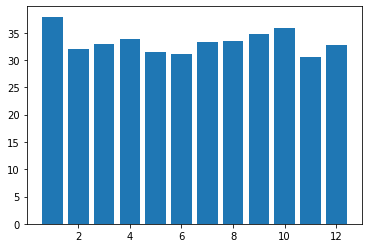

In [45]:
plt.bar(train["Month"],train["Beer consumption"])

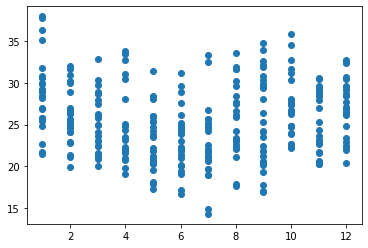

In [46]:
plt.scatter(train["Month"],train["Beer consumption"])

In [47]:
print(finaldata[["Month","Beer consumption"]].corr())


                     Month  Beer consumption
Month             1.000000          0.039908
Beer consumption  0.039908          1.000000


In [48]:
print(train[["Month","Beer consumption"]].corr())

                     Month  Beer consumption
Month             1.000000          0.000819
Beer consumption  0.000819          1.000000


<BarContainer object of 31 artists>

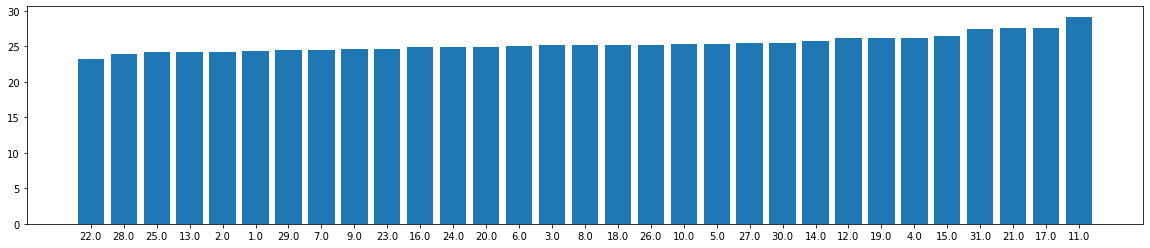

In [49]:
byday = train[["Day", "Beer consumption"]]
byday = byday.groupby("Day").mean().sort_values(by="Beer consumption").reset_index()
plt.figure(figsize=(20, 4))
plt.bar(range(1, 32), byday["Beer consumption"], tick_label=byday["Day"])

In [50]:
train.head()

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
34,22.12,19.9,23.7,3.2,0.0,2.0,4.0,24.738
87,22.14,20.5,26.6,0.0,1.0,3.0,29.0,26.116
57,24.64,20.4,31.4,0.6,0.0,2.0,27.0,26.241
152,16.04,15.0,17.5,0.5,0.0,6.0,2.0,20.106
204,18.46,14.3,25.8,0.0,0.0,7.0,24.0,21.104


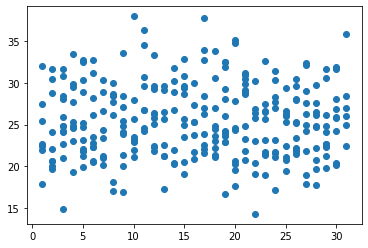

In [51]:
plt.scatter(train["Day"],train["Beer consumption"])

In [52]:
print(finaldata[["Day", "Beer consumption"]].corr())

                       Day  Beer consumption
Day               1.000000          0.025969
Beer consumption  0.025969          1.000000


In [53]:
print(train[["Day","Beer consumption"]].corr())

                      Day  Beer consumption
Day               1.00000          -0.00267
Beer consumption -0.00267           1.00000


In [54]:
corelation=train.corr()

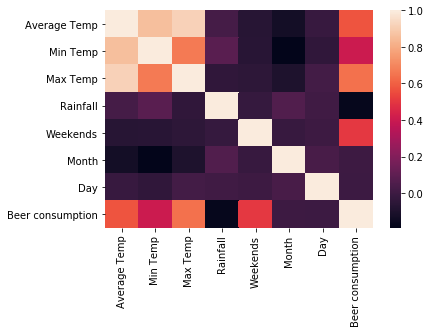

In [55]:
sns.heatmap(corelation)

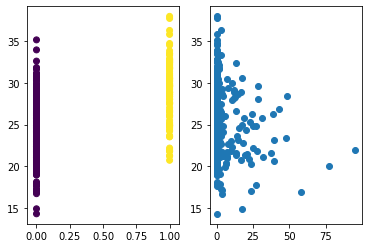

In [56]:
remainingdata = train[["Rainfall", "Weekends", "Beer consumption"]]
fig, ax = plt.subplots(1,2)
ax[0].scatter(remainingdata["Weekends"], remainingdata["Beer consumption"], c=remainingdata["Weekends"])
ax[1].scatter(remainingdata["Rainfall"], remainingdata["Beer consumption"])

In [57]:
remainingdata.corr()

,Rainfall,Weekends,Beer consumption
Rainfall,1.000000,-0.022600,-0.176745
Weekends,-0.022600,1.000000,0.502462
Beer consumption,-0.176745,0.502462,1.000000


(array([241.,  24.,  14.,   4.,   4.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0.  ,  9.48, 18.96, 28.44, 37.92, 47.4 , 56.88, 66.36, 75.84,
        85.32, 94.8 ]),
 <a list of 10 Patch objects>)

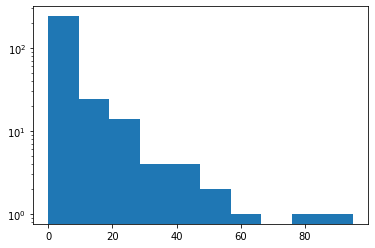

In [58]:
plt.hist(remainingdata["Rainfall"],log=True)

In [59]:
def lograinfall(train):
    train["Rainfall"]=train["Rainfall"].apply(np.log)
    train.loc[train["Rainfall"]==-np.inf,"Rainfall"]=0
    return train

In [60]:
train=lograinfall(train)
train["Rainfall"]

34     1.163151
87     0.000000
57    -0.510826
152   -0.693147
204    0.000000
         ...   
123    0.000000
320    0.000000
15     0.693147
125    0.000000
265    0.000000
Name: Rainfall, Length: 292, dtype: float64

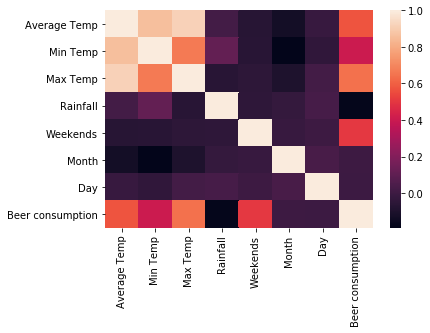

In [61]:
sns.heatmap(train.corr())

In [62]:
print(train.corr()["Beer consumption"])

Average Temp        0.572571
Min Temp            0.405277
Max Temp            0.642202
Rainfall           -0.177558
Weekends            0.502462
Month               0.000819
Day                -0.002670
Beer consumption    1.000000
Name: Beer consumption, dtype: float64


In [63]:
test=lograinfall(test)

In [64]:
test

,Average Temp,Min Temp,Max Temp,Rainfall,Weekends,Month,Day,Beer consumption
211,19.24,12.8,26.6,0.000000,0.0,7.0,31.0,24.726
97,18.68,14.7,24.3,-0.916291,0.0,4.0,8.0,23.362
114,19.18,17.4,23.3,0.000000,1.0,4.0,25.0,27.420
6,24.00,19.5,33.7,0.000000,0.0,1.0,7.0,29.732
126,17.80,15.8,21.7,0.000000,0.0,5.0,7.0,19.143
...,...,...,...,...,...,...,...,...
353,22.84,19.6,29.0,2.128232,1.0,12.0,20.0,30.127
69,22.88,20.1,28.1,2.251292,0.0,3.0,11.0,22.933
100,21.74,17.2,28.4,0.000000,1.0,4.0,11.0,30.505
113,22.52,19.3,28.1,0.000000,0.0,4.0,24.0,24.388


In [65]:
Xtrain,Ytrain=train.drop(["Beer consumption"],axis=1),train["Beer consumption"]
Xtest,Ytest=test.drop(["Beer consumption"],axis=1),test["Beer consumption"]

In [66]:
print(Xtrain.shape,Ytrain.shape)

(292, 7) (292,)


In [67]:
print(Xtest.shape,Ytest.shape)

(73, 7) (73,)


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr=LinearRegression()

In [70]:
lr.fit(Xtrain,Ytrain)
lr.coef_

array([-0.11984465,  0.11272755,  0.70502985, -0.3820822 ,  5.17234625,
        0.09599667, -0.00705076])

In [71]:
prediction=lr.predict(Xtest)

In [72]:
print(prediction[0:8])

[23.83463378 22.71863641 26.96043352 28.61839813 20.86797145 31.78511617
 28.98225955 20.73384791]


In [73]:
print(Ytest[0:8])

211    24.726
97     23.362
114    27.420
6      29.732
126    19.143
52     30.825
157    30.498
131    19.052
Name: Beer consumption, dtype: float64


In [74]:
lr.score(Xtest,Ytest)

0.7333958001707176